<a href="https://colab.research.google.com/github/Adasyam31494/Generative-AI-with-Large-Language-Models/blob/main/energy_based_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, _), _ = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_train = x_train.reshape((-1, 28 * 28))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


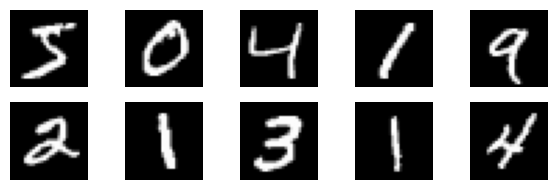

In [4]:
plt.figure(figsize=(6, 2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [5]:
class EnergyModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = layers.Dense(128, activation="relu")
        self.dense2 = layers.Dense(64, activation="relu")
        self.energy = layers.Dense(1)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.energy(x)

In [6]:
def contrastive_divergence(model, real_samples, lr=0.001):
    with tf.GradientTape() as tape:
        energy_real = model(real_samples)
        noise = tf.random.normal(shape=tf.shape(real_samples))
        energy_noise = model(noise)
        loss = tf.reduce_mean(energy_real) - tf.reduce_mean(energy_noise)

    gradients = tape.gradient(loss, model.trainable_weights)
    for g, w in zip(gradients, model.trainable_weights):
        w.assign_sub(lr * g)
    return loss

In [7]:
model = EnergyModel()
model.build(input_shape=(None, 784))
model.summary()

losses = []
for epoch in range(120):
    loss = contrastive_divergence(model, x_train)
    losses.append(loss.numpy())
    print(f"Epoch {epoch+1}: Loss = {loss.numpy():.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'energy_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "energy_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1: Loss = 0.7087
Epoch 2: Loss = 0.6683
Epoch 3: Loss = 0.6327
Epoch 4: Loss = 0.5920
Epoch 5: Loss = 0.5598
Epoch 6: Loss = 0.5285
Epoch 7: Loss = 0.4872
Epoch 8: Loss = 0.4554
Epoch 9: Loss = 0.4163
Epoch 10: Loss = 0.3792
Epoch 11: Loss = 0.3502
Epoch 12: Loss = 0.3134
Epoch 13: Loss = 0.2742
Epoch 14: Loss = 0.2407
Epoch 15: Loss = 0.2079
Epoch 16: Loss = 0.1676
Epoch 17: Loss = 0.1353
Epoch 18: Loss = 0.1013
Epoch 19: Loss = 0.0635
Epoch 20: Loss = 0.0295
Epoch 21: Loss = -0.0093
Epoch 22: Loss = -0.0452
Epoch 23: Loss = -0.0773
Epoch 24: Loss = -0.1150
Epoch 25: Loss = -0.1440
Epoch 26: Loss = -0.1796
Epoch 27: Loss = -0.2164
Epoch 28: Loss = -0.2505
Epoch 29: Loss = -0.2845
Epoch 30: Loss = -0.3239
Epoch 31: Loss = -0.3604
Epoch 32: Loss = -0.3953
Epoch 33: Loss = -0.4275
Epoch 34: Loss = -0.4659
Epoch 35: Loss = -0.5013
Epoch 36: Loss = -0.5291
Epoch 37: Loss = -0.5685
Epoch 38: Loss = -0.6011
Epoch 39: Loss = -0.6421
Epoch 40: Loss = -0.6803
Epoch 41: Loss = -0.7214
Epoc

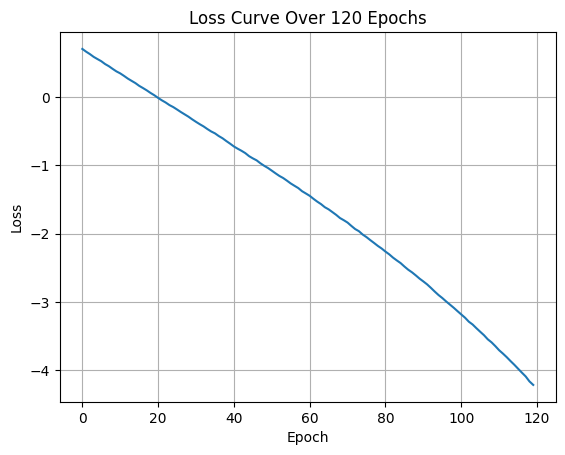

In [8]:
plt.plot(losses)
plt.title("Loss Curve Over 120 Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()